# CNN(Convolutional Neural Network, 합성곱 신경망)

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import convolve, correlate, convolve2d,correlate2d  # 합성곱(convolution) 연산

from sklearn.datasets import load_sample_image  # 예제 이미지 로드
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras

#Convolution(합성곱)

## 1차원 합성곱

In [2]:
x = np.arange(1,5)
x

array([1, 2, 3, 4])

In [3]:
y = np.array([1,2])
y

array([1, 2])

In [4]:
convolve(x, y, mode='valid')

array([ 4,  7, 10])

In [5]:
convolve(x,y, mode='same') # 원본배열의 크기와 같아짐

array([ 1,  4,  7, 10])

In [6]:
convolve(x,y,mode='full')

array([ 1,  4,  7, 10,  8])

## 1-D Cross Correlation(교차 상관)

In [7]:
print(x)
print(y)

[1 2 3 4]
[1 2]


In [8]:
correlate(x, y, mode='valid')
#[1,2,3,4]
# 1,2
#   1,2
#     1,2
#> mode='valid': 출력 길이 = len(x) -len(y) + 1

array([ 5,  8, 11])

In [9]:
correlate(x, y, mode='same') #x의 크기를 유지시키며 교차 상관을 진행하겠다
# 0[1,2,3,4]
# 1,2
#   1,2
#     1,2
#       1,2
#> mode='same': 출력 길이 = len(x)
# 출력 배열의 길이가 원본 배열 x의 길이와 같아지도록 zero padding을 추가함.

array([ 2,  5,  8, 11])

In [10]:
correlate(x,y, mode='full')
# 0[1,2,3,4]0
# 1,2
#   1,2
#     1,2
#       1,2
#         1,2
#> mode='full': 출력 길이 = len(x) + len(y) - 1
# 원본 배열 x의 모든 원소가 동일한 횟수로 합성곱 연산에 기여할 수 있도록 zero padding을 추가함.

array([ 2,  5,  8, 11,  4])

## 2차원 합성곱(2-d Convolution)

In [11]:
x = np.arange(1,17).reshape((4,4))
x

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16]])

In [12]:
y = np.array([[0,1],
             [2,0]])
y

array([[0, 1],
       [2, 0]])

In [13]:
convolve2d(x, y, mode='valid')
#[1,2,3,4]
#[5,6,7,8]
# 0,2,
# 1,0
#   0,2
#   1,0
#     0,2
#     1,0
#[9,10,11,12]
#[13,14,15,16]
# 같은 위치에 있는 배열들끼리 곱한다.

array([[ 9, 12, 15],
       [21, 24, 27],
       [33, 36, 39]])

In [14]:
convolve2d(x, y, mode='same')
#0,0,0,0,0
#0[1,2,3,4]
#0[5,6,7,8]

array([[ 0,  1,  2,  3],
       [ 2,  9, 12, 15],
       [10, 21, 24, 27],
       [18, 33, 36, 39]])

In [15]:
convolve2d(x, y, mode='full')
#0,0,0,0,0,0
#0[1,2,3,4]0
#0[5,6,7,8]0

array([[ 0,  1,  2,  3,  4],
       [ 2,  9, 12, 15,  8],
       [10, 21, 24, 27, 12],
       [18, 33, 36, 39, 16],
       [26, 28, 30, 32,  0]])

In [16]:
np.flip(y, axis=0)  # 상/하 반전

array([[2, 0],
       [0, 1]])

In [17]:
np.flip(y, axis=1)  # 좌/우 반전

array([[1, 0],
       [0, 2]])

In [18]:
np.flip(y)  # 상/하/좌/우 반전

array([[0, 2],
       [1, 0]])

## Cross-correlation(교차상관)

In [19]:
print(x)
print(y)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]
[[0 1]
 [2 0]]


In [20]:
correlate2d(x,y,mode='valid')
#[1,2,3,4]
#[5,6,7,8]
# 0,1,
# 2,0

array([[12, 15, 18],
       [24, 27, 30],
       [36, 39, 42]])

In [21]:
correlate2d(x,y, mode='same')
#[1,2,3,4]0
#[5,6,7,8]0
# 0,0,0,0,0

array([[12, 15, 18, 16],
       [24, 27, 30, 24],
       [36, 39, 42, 32],
       [14, 15, 16,  0]])

In [22]:
correlate2d(x,y, mode='full')
#0,0,0,0,0,0
#0[1,2,3,4]0
#0[5,6,7,8]0
#0,0,0,0,0,0

array([[ 0,  2,  4,  6,  8],
       [ 1, 12, 15, 18, 16],
       [ 5, 24, 27, 30, 24],
       [ 9, 36, 39, 42, 32],
       [13, 14, 15, 16,  0]])

## 3차원 합성곱(3-d Convolution)

In [23]:
china = load_sample_image('china.jpg')
# jpg 이미지를 numpy.ndarray로 변환해서 로드.

In [24]:
flower =load_sample_image('flower.jpg')

In [25]:
flower.shape, china.shape
# 3차원 배열 확인

((427, 640, 3), (427, 640, 3))

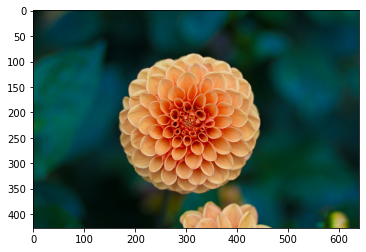

In [26]:
plt.imshow(flower)
plt.show()

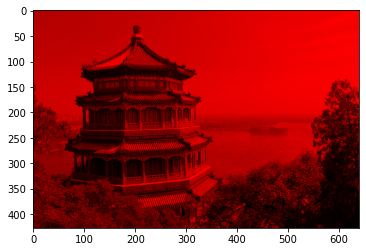

In [27]:
china_red = china.copy()
china_red[:, :, [1,2]] = 0  # Green, Blue의 모든 픽셀들의 값을 0으로 세팅
# 0,1,2 인덱스중 1, 2는 0으로 만들겠다. => 0 Red, 1 Green, 2 Blue
plt.imshow(china_red)
plt.show()

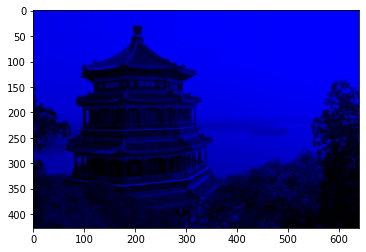

In [28]:
china_blue = china.copy()
china_blue[:, :, 0:2] = 0
plt.imshow(china_blue)
plt.show()

(427, 640, 3)


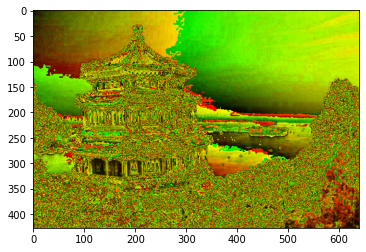

In [29]:
# 3차원 배열에서의 convolution(합성곱)연산
filter = np.ones(shape=(3,3,3))
filter[:,:,[1,2]] = 0 # Red
conv = convolve(china, filter, mode='same')
print(conv.shape)

plt.imshow(conv.astype(np.uint8)) # 8-bit unsigined integer : overflow가 생기면, 0~255까지의 범위의 숫자로 변환해라
plt.show()
# 합성곱을 하게 되면, 숫자로 표현할 수 있는 스케일의 크기를 넘어버리게 되므로, astype을 사용한다.

(427, 640, 3)


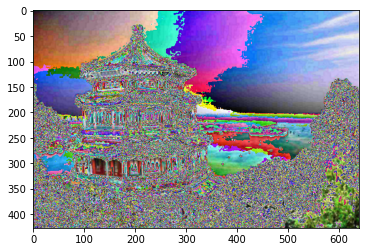

In [30]:
# 3차원 배열에서의 convolution(합성곱)연산
filter = np.ones(shape=(3,3,3))
filter[:,:,[0,2]] = 0 # Green
conv = convolve(china, filter, mode='same')
print(conv.shape)

plt.imshow(conv.astype(np.uint8))
plt.show()

(height, width, 3) = color(rgb)
(height, width, 4) = color(ymck)
(height, width) = black/white (흑백)

## Pooling 연산

In [31]:
x = np.arange(16).reshape((4,4))
print(x)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


In [32]:
max_pooling = keras.layers.MaxPool2D()
# 자기 필터 안의 max값을 찾아주는 것

In [33]:
x = x.reshape((1,4,4,1))
x_pooled = max_pooling(x)
x_pooled

<tf.Tensor: shape=(1, 2, 2, 1), dtype=int64, numpy=
array([[[[ 5],
         [ 7]],

        [[13],
         [15]]]])>

In [34]:
tf.reshape(x_pooled,[2,2])

<tf.Tensor: shape=(2, 2), dtype=int64, numpy=
array([[ 5,  7],
       [13, 15]])>

In [35]:
# tensor -> numpy ndarray로 변환 -> ndarray의 reshape 메서드 호출
x_pooled.numpy().reshape((2,2))

array([[ 5,  7],
       [13, 15]])

In [36]:
x = np.arange(25).reshape((5,5))
x

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [37]:
x = x.reshape((1,5,5,1))
# 샘플 갯수, 가로길이, 세로길이, rgb= r
x_pooled = max_pooling(x)
x_pooled

<tf.Tensor: shape=(1, 2, 2, 1), dtype=int64, numpy=
array([[[[ 6],
         [ 8]],

        [[16],
         [18]]]])>

In [38]:
tf.reshape(x_pooled, [2,2])

<tf.Tensor: shape=(2, 2), dtype=int64, numpy=
array([[ 6,  8],
       [16, 18]])>

## 이미지에서의 Pooling

In [39]:
china.shape

(427, 640, 3)

In [40]:
china_4d = china.reshape((1,427,640,3))
china_pooled = max_pooling(china_4d)
china_pooled.shape
# 2d로 만들었기 때문에 크기가 절반으로 줄어든 이미지가 됨

TensorShape([1, 213, 320, 3])

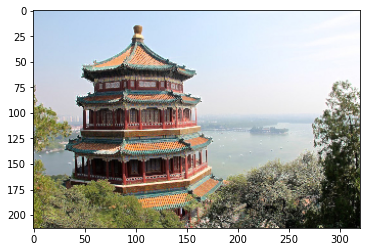

In [41]:
img = china_pooled.numpy()[0]
plt.imshow(img)
plt.show()

## CNN

**CNN(Convolutional Neural Network, 합성곱 신경망)**

* filter : 합성곱 레이어(convolutional layter)의 unit(neuron)
* kernel : 합성곱 레이어의 입력에 곱해지는 가중치(weight). 필터의 값.
* feature map(특성 맵): 합성곱 연산을 통해서 얻은 출력.
* padding : 입력 배열 주위에 가상의 원소(0)를 채우는 것.
    * same padding: 입력과 특성 맵의 크기를 동일하게 만들기 위한 패딩.
    * valid padding: 패딩 없이 입력 배열에 합성곱 연산을 수행해서 특성 맵을 만드는 것. 특성 맵의 크기는 입력 배열의 크기보다 줄어들게 됨.
* stride : filter를 이동시키는 보폭. convolution에서 기본값은 1.
* pooling :
    * max pooling: 필터 내에서 입력 배열의 최댓값을 선택하는 것
    * average pooling : 필터 내에서 입력 배열의 평균값을 선택하는 것
    * 평균 풀링은 특성 맵의 중요한 정보들을 희석시킬 수 있기 때문에, 많은 경우에 평균 풀링보다 최대풀링을 사용함.
    * 합성곱에서 stride를 크게 해서 특성 맵의 크기를 줄이는 것 보다, 풀링 층에서 크기를 줄이는 것이 일반적으로 더 나은 성능을 내기 때문에 풀링을 사용함.
    



## Fashion MNINST datasets

In [42]:
(x_train_full, y_train_full), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [43]:
x_train_full.shape

(60000, 28, 28)

x_train_full, x_test는 0~255 정수 스케일.

0~1 실수 스케일로 변환할 필요가 있음.(Tensorflow는 암묵적인 타입 변환을 수행하지 않음.)

In [44]:
x_train_full = x_train_full / 255
x_test = x_test/255

tensorflow.keras의 합성곱 층(convolutional layer)는 입력이 3차원 배열(height, width, depth(rgb))이어야 함. depth 차원이 없는 흑백 이미지인 경우에는 3차원 배열로 모양(shape)을 변환해야 함. depth=1인 3차원 형태로 변환을 할 필요가 있음.

In [45]:
x_train_full = x_train_full.reshape((-1,28,28,1))
x_test = x_test.reshape((-1,28,28,1))

In [46]:
x_train_full.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

전체 훈련 셋을 훈련 셋(train set)과 검증 셋(validation set)으로 분리

In [47]:
x_tr, x_val, y_tr, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.2,
                                                  stratify=y_train_full,
                                                  random_state=42)

## CNN 모델 생성/훈련

convolution layer(filters=32개 (3, 3) 모양)

--> max pooling

--> convolution layer(filters=64개 (3, 3) 모양)

--> max pooling

--> flatten --> Dense(units=100) --> Dropout(rate=0.4) --> output layer

In [48]:
# Seqential 모델 생성
conv_model = keras.Sequential()
# 합성곱 층 추가
conv_model.add(keras.layers.Convolution2D(filters=32, kernel_size=3, padding='same',
                                     activation='relu', input_shape=(28, 28, 1)))
# 최대 풀링 층 추가
conv_model.add(keras.layers.MaxPooling2D())
# 두번째 합성곱 층 추가
conv_model.add(keras.layers.Convolution2D(filters=64, kernel_size=3, padding='same',
                                     activation='relu'))
# 두번째 최대 풀링 층 추가
conv_model.add(keras.layers.MaxPooling2D())
# Flatten 층 추가 - Dense layer를 연결하기 위해서
conv_model.add(keras.layers.Flatten())
# Dense 층 추가
conv_model.add(keras.layers.Dense(units=100, activation='relu'))
# Dropout 층 추가 - overfitting 줄이기 위한 규제
conv_model.add(keras.layers.Dropout(rate=0.3))
# output 층 추가
conv_model.add(keras.layers.Dense(units=10, activation='softmax'))

conv_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

In [49]:
# 첫 번째 합성곱 층의 파라미터 개수 = (kernel_x * kernel_y * kernel_z + bias)* filters
(3*3*1+1) *32

320

In [50]:
# 두 번째 합성곱 층의 파라미터 개수 = (kernel_x * kernel_y * kernel_z + bias)* filters
(3*3*32+1) *64

18496

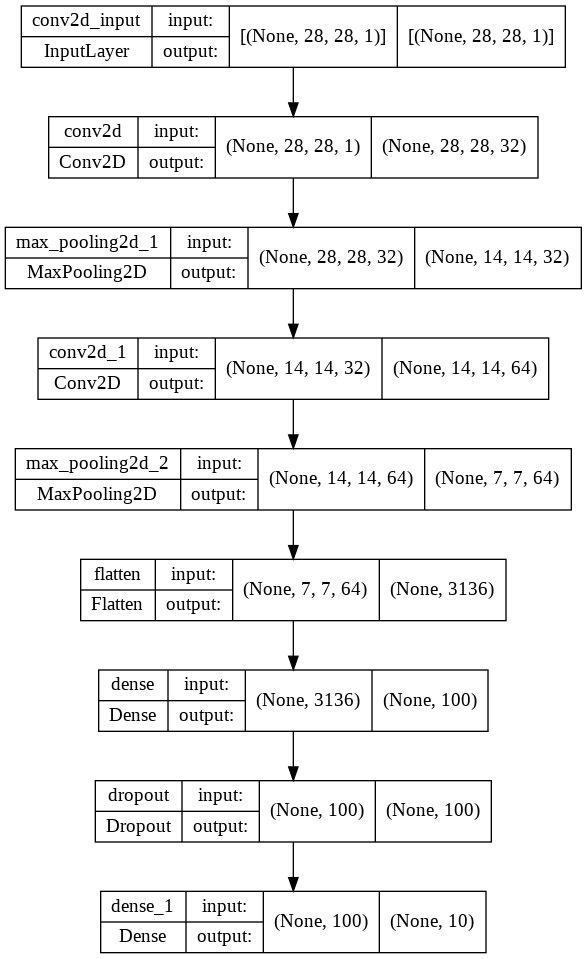

In [51]:
keras.utils.plot_model(conv_model, show_shapes=True)

In [52]:
conv_model.compile(optimizer='Adam',
                   loss=keras.losses.sparse_categorical_crossentropy,
                   metrics=keras.metrics.sparse_categorical_accuracy)

In [ ]:
# 모델 컴파일: 최적화 알고리즘, 손실 함수, 평가 지표 설정
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [53]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('best_cnn_model.h5',
                                                save_best_only=True) # best모델을 찾으면 저장해라.
early_stop_cb = keras.callbacks.EarlyStopping(patience=3,
                                              restore_best_weights=True)

In [54]:
history = conv_model.fit(x_tr,y_tr, epochs=100,
                         callbacks=[checkpoint_cb, early_stop_cb],
                         validation_data=(x_val,y_val))

Epoch 1/100
1500/1500 [==============================] - 17s 4ms/step - loss: 0.4921 - sparse_categorical_accuracy: 0.8226 - val_loss: 0.3386 - val_sparse_categorical_accuracy: 0.8767
Epoch 2/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3188 - sparse_categorical_accuracy: 0.8850 - val_loss: 0.2642 - val_sparse_categorical_accuracy: 0.9047
Epoch 3/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2749 - sparse_categorical_accuracy: 0.8999 - val_loss: 0.2356 - val_sparse_categorical_accuracy: 0.9150
Epoch 4/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2396 - sparse_categorical_accuracy: 0.9118 - val_loss: 0.2316 - val_sparse_categorical_accuracy: 0.9162
Epoch 5/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2151 - sparse_categorical_accuracy: 0.9213 - val_loss: 0.2268 - val_sparse_categorical_accuracy: 0.9189
Epoch 6/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1949 

In [55]:
history.history

{'loss': [0.4921105206012726,
  0.3188478350639343,
  0.27494633197784424,
  0.2396155446767807,
  0.21510480344295502,
  0.19488514959812164,
  0.1754932701587677,
  0.1575668752193451,
  0.14487743377685547],
 'sparse_categorical_accuracy': [0.8226249814033508,
  0.8850208520889282,
  0.8999166488647461,
  0.9117708206176758,
  0.9213333129882812,
  0.9275000095367432,
  0.9338750243186951,
  0.9411875009536743,
  0.9455000162124634],
 'val_loss': [0.338580846786499,
  0.2641814947128296,
  0.23558852076530457,
  0.23164814710617065,
  0.22683855891227722,
  0.21462489664554596,
  0.21870921552181244,
  0.22646333277225494,
  0.22649401426315308],
 'val_sparse_categorical_accuracy': [0.8766666650772095,
  0.9046666622161865,
  0.9150000214576721,
  0.9162499904632568,
  0.918916642665863,
  0.9223333597183228,
  0.9234166741371155,
  0.9243333339691162,
  0.9243333339691162]}

In [56]:
df = pd.DataFrame(history.history)
df

,loss,sparse_categorical_accuracy,val_loss,val_sparse_categorical_accuracy
0,0.492111,0.822625,0.338581,0.876667
1,0.318848,0.885021,0.264181,0.904667
2,0.274946,0.899917,0.235589,0.915000
3,0.239616,0.911771,0.231648,0.916250
4,0.215105,0.921333,0.226839,0.918917
5,0.194885,0.927500,0.214625,0.922333
6,0.175493,0.933875,0.218709,0.923417
7,0.157567,0.941188,0.226463,0.924333
8,0.144877,0.945500,0.226494,0.924333


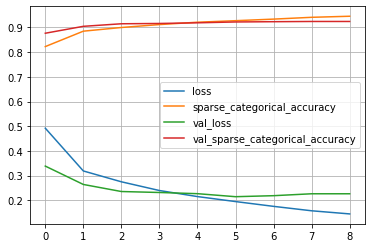

In [58]:
df.plot()
plt.grid()
plt.show()

In [60]:
best_model = history.model
pred_prob = best_model.predict(x_test) # keras의 predict는 예측확률
pred_prob[:5]

array([[2.75633539e-07, 8.41161985e-09, 5.00669337e-08, 7.80136773e-08,
        6.16838192e-10, 1.75172772e-05, 1.48267048e-07, 3.81364400e-04,
        1.39737168e-07, 9.99600470e-01],
       [9.50043102e-07, 1.20604739e-13, 9.99954104e-01, 4.49089477e-08,
        9.12479481e-06, 1.09699899e-16, 3.57974859e-05, 3.78959629e-16,
        4.63365596e-11, 5.95772021e-13],
       [1.27418451e-10, 1.00000000e+00, 1.87044252e-11, 2.91143195e-12,
        3.54938128e-11, 1.50250113e-15, 9.17398015e-12, 1.32957786e-17,
        2.23621645e-14, 1.11881048e-16],
       [1.44335632e-09, 1.00000000e+00, 3.49800085e-11, 1.14931710e-11,
        1.22854227e-10, 3.26281559e-15, 6.05312953e-11, 2.17882378e-16,
        2.29531512e-14, 4.68545751e-16],
       [1.02380915e-02, 5.13796827e-08, 4.67433827e-04, 1.94850491e-05,
        3.10030737e-04, 2.56797357e-08, 9.88962710e-01, 1.70444936e-10,
        2.20839047e-06, 5.36036140e-08]], dtype=float32)

In [61]:
te_pred = np.argmax(pred_prob, axis=1)  # 테스트 예측값
te_pred[:5]

array([9, 2, 1, 1, 6])

In [72]:
np.mean(y_test == te_pred) # 테스트 정확도

0.9145

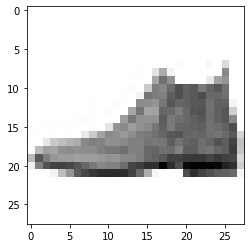

In [73]:
test_img = x_test[0].reshape((28, 28))  # (28, 28, 1) -> (28, 28)
plt.imshow(test_img, cmap=plt.cm.binary)
plt.show()

### 저장된 최적 모델 분석(시각화)

In [74]:
best_model = keras.models.load_model('best_cnn_model.h5')

In [75]:
best_model.layers  # CNN에서 작성된 레이어 - 은닉 층, 출력 층

In [76]:
best_model.inputs  # CNN 입력층

[<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv2d_input')>]

### 첫번째 합성곱 층 시각화

In [77]:
conv_1 = keras.Model(best_model.inputs, best_model.layers[0].output)

In [78]:
feature_map_1 = conv_1.predict(x_test[:1])

In [79]:
feature_map_1.shape

(1, 28, 28, 32)

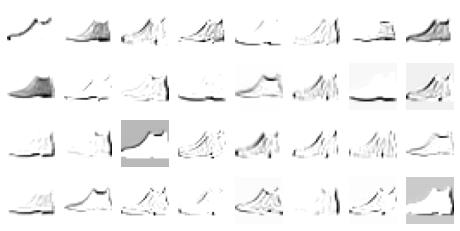

In [80]:
fig, ax = plt.subplots(nrows=4, ncols=8, figsize=(8, 4))
for i in range(4):
    for j in range(8):
        idx = i * 8 + j
        img = feature_map_1[0, :, :, idx]  # 합성곱 층 각 필터에서의 출력
        ax[i, j].imshow(img, cmap=plt.cm.binary)
        ax[i, j].axis('off')

plt.show()

### 두번째 합성곱 층 시각화

In [81]:
conv_2 = keras.Model(best_model.inputs, best_model.layers[2].output)
feature_map_2 = conv_2.predict(x_test[:1])
feature_map_2.shape

(1, 14, 14, 64)